# PROJET DE VISUALISATION DES DONNEES DE FORD GOBIKE

<img src="FordGobike.jpg">

## Table des matières
<ul>
<li><a href="#introduction">Introduction</a></li>
</ul>

## Introduction

L'objectif de ce présent projet est d'analyser et de visualiser les données de FordGobike. Cet ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco. Le jeu de données contient seize (16) variables et 183412 observations. 

## Analyse Exploratoire des données

Dans cette partie, nous allons importer les librairies nécessaires pour l'analyse, explorer les données, détecter les problèmes de qualités et de structures, néttoyer proprement nos données avant de les visauliser. 

In [506]:
# Importation des librairies
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")

%matplotlib inline
# Importation du package plotly pour la visualisation interactive des données



### Chargement de la dataset

In [507]:
# Importation de la base
df = pd.read_csv('fordgobike.csv')

In [508]:
# Afficher les cinq (05) premières observations de la base
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

### Evaluation des données de la dataset

In [509]:
# Afficher les cinq (05) dernières observations de la base
df.tail(5)

duration_sec                start_time                  end_time  \
183407           480  2019-02-01 00:04:49.7240  2019-02-01 00:12:50.0340   
183408           313  2019-02-01 00:05:34.7440  2019-02-01 00:10:48.5020   
183409           141  2019-02-01 00:06:05.5490  2019-02-01 00:08:27.2200   
183410           139  2019-02-01 00:05:34.3600  2019-02-01 00:07:54.2870   
183411           271  2019-02-01 00:00:20.6360  2019-02-01 00:04:52.0580   

        start_station_id                                start_station_name  \
183407              27.0                           Beale St at Harrison St   
183408              21.0  Montgomery St BART Station (Market St at 2nd St)   
183409             278.0                            The Alameda at Bush St   
183410             220.0                       San Pablo Ave at MLK Jr Way   
183411              24.0                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude  end_station_id  \
183407               37.788059              -122.391865           324.0   
183408               37.789625              -122.400811            66.0   
183409               37.331932              -121.904888           277.0   
183410               37.811351              -122.273422           216.0   
183411               37.789677              -122.390428            37.0   

                           end_station_name  end_station_latitude  \
183407  Union Square (Powell St at Post St)             37.788300   
183408                3rd St at Townsend St             37.778742   
183409            Morrison Ave at Julian St             37.333658   
183410             San Pablo Ave at 27th St             37.817827   
183411                  2nd St at Folsom St             37.785000   

        end_station_longitude  bike_id   user_type  member_birth_year  \
183407            -122.408531     4832  Subscriber             1996.0   
183408            -122.392741     4960  Subscriber             1984.0   
183409            -121.908586     3824  Subscriber             1990.0   
183410            -122.275698     5095  Subscriber             1988.0   
183411            -122.395936     1057  Subscriber             1989.0   

       member_gender bike_share_for_all_trip  
183407          Male                      No  
183408          Male                      No  
183409          Male                     Yes  
183410          Male                      No  
183411          Male                      No

In [510]:
# Afficher aléatoirement cinq (05) observations de la dataset
df.sample(5)

duration_sec                start_time                  end_time  \
64708            458  2019-02-20 11:15:37.2640  2019-02-20 11:23:15.6500   
39865            498  2019-02-23 00:36:03.5010  2019-02-23 00:44:22.4170   
106910           465  2019-02-13 17:17:41.5690  2019-02-13 17:25:27.5090   
8633             635  2019-02-28 08:10:08.0310  2019-02-28 08:20:43.8490   
109119           949  2019-02-12 19:48:18.1770  2019-02-12 20:04:08.0020   

        start_station_id                                start_station_name  \
64708               61.0                               Howard St at 8th St   
39865              340.0                           Harmon St at Adeline St   
106910              90.0                             Townsend St at 7th St   
8633                56.0                                     Koshland Park   
109119             110.0  17th & Folsom Street Park (17th St at Folsom St)   

        start_station_latitude  start_station_longitude  end_station_id  \
64708                37.776513              -122.411306           129.0   
39865                37.849735              -122.270582           273.0   
106910               37.771058              -122.402717            44.0   
8633                 37.773414              -122.427317            67.0   
109119               37.763708              -122.415204           285.0   

                                         end_station_name  \
64708                              Harrison St at 20th St   
39865                              Fulton St at Ashby Ave   
106910  Civic Center/UN Plaza BART Station (Market St ...   
8633    San Francisco Caltrain Station 2  (Townsend St...   
109119                         Webster St at O'Farrell St   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
64708              37.758862            -122.412544     6319  Subscriber   
39865              37.855574            -122.263565     6398  Subscriber   
106910             37.781074            -122.411738     2900  Subscriber   
8633               37.776639            -122.395526     5829  Subscriber   
109119             37.783521            -122.431158     5333  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  
64708              1991.0          Male                      No  
39865              1970.0          Male                      No  
106910             1981.0          Male                      No  
8633               1987.0          Male                      No  
109119             1987.0          Male                      No

In [511]:
# Structure de la dataset
df.shape

(183412, 16)

In [512]:
# Nom des différentes variables de la dataset
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [513]:
# Informations sur le type de données des variables de la dataset
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [514]:
# Vérifier les valeurs manquantes par colonnes
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [515]:
# Statistique descriptive des variables numériques de la dataset
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [516]:
# Afficher les valeurs dupliquées
df.duplicated().sum()

0

Après évaluation (programmatique) des données, nous recensons les problèmes de qualités suivantes :
- Présence de valeurs manquantes pour les variables **start_station_id**, **start_station_name**, **end_station_id**, **end_station_name**, **member_birth_year** et **member_gender**.
- Les variables suivantes : **start_time** et **end_time** ne sont pas sous format date.
- Les variables **user_type**, **member_gender** et **bike_share_for_all_trip** sont des variables catégorielles et non des objects et floats. 
- **start_station_latitude**, **start_station_longitude**, **end_station_latitude**, **end_station_longitude** sont inutiles. Par conséquent, ne devront pas nécessairement être prises en compte dans les analyses et pour la visualisation. 

### Nettoyage de données

### Copie des données

In [517]:
# Copie de la dataset
data = df.copy()

### Résolution des problèmes de qualités

- **Présence de valeurs manquantes pour les variables start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year et member_gender.**

#### Définir

- Supprimer les valeurs manquantes des colonnes **start_station_id**, **start_station_name**, **end_station_id**, **end_station_name**, **member_birth_year** et **member_gender.**

#### Coder

In [518]:
# Supprimer les valeurs manquantes de la dataset
data.dropna(inplace = True)

#### Tester

In [519]:
# Vérifier les valeurs manquantes de la dataset
data.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

- **Les variables suivantes : start_time et end_time ne sont pas sous format date.**

#### Définir

Convertir les colonnes **start_time** et **end_time** sous format date.

#### Coder

In [520]:
# Convertir start_time et end_time sous format date
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

#### Tester

In [521]:
# Afficher les types des colonnes de la dataset
data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

- **Les variables user_type, member_gender et bike_share_for_all_trip sont des variables catégorielles et non des objects et floats.**

#### Définir

Mettre les colonnes suivantes **user_type**, **member_gender** et **bike_share_for_all_trip** sous forme de variables catégorielles.

#### Coder

In [522]:
# Mettre sous forme de variables catégorielles 
data.user_type = data.user_type.astype('category')
data.member_gender = data.member_gender.astype('category')
data.bike_share_for_all_trip = data.bike_share_for_all_trip.astype('category')

#### Tester

In [523]:
# Types des variables de la base
data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

- **Créer une colonne age des utilisateurs à partir de la colonne member_birth_year.**

#### Définir

Créer la colonne **age**.

#### Coder

In [524]:
# Créer une colonne age des utilisateurs 
data['age'] = 2022 - data['member_birth_year']

#### Tester

In [525]:
# Vérifier que la variable age a été effectivement créée
data.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip   age  
0          Male                      No  38.0  
2          Male                      No  50.0  
3         Other                      No  33.0  
4          Male                     Yes  48.0  
5          Male                      No  63.0

- **Mettre la nouvelle colonne age créée sous format integer au lieu de float.**

#### Définir

Convertir la variable **age** en entier.

#### Coder

In [526]:
# Convertir la colonne age en entier
data.age = data.age.astype('int64')

#### Tester

In [527]:
# Vérifier le type des données de la base
data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
age                                 int64
dtype: object

In [528]:
- Créer une colonne à partir de et le mettre sous format entier.

SyntaxError: invalid syntax (1945972657.py, line 1)

#### Définir

- **Créer les différentes variables suivantes start_time_month, start_time_month_num, start_time_weekday, start_time_hour et end_time_hour à partir des colonnes start_time et end_time.**

#### Définir

Création de nouvelles colonnes à partir des colonnes **start_time** et **end_time.**

#### Coder

In [529]:
# Création des colonnes suivantes
data['start_time_month'] = data['start_time'].dt.strftime('%B')
data['start_time_weekday'] = data['start_time'].dt.strftime('%A')
data['start_time_hour'] = data['start_time'].dt.hour
data['end_time_hour'] = data['end_time'].dt.hour

#### Tester

In [530]:
# Afficher les colonnes de la dataset
data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'start_time_month', 'start_time_weekday', 'start_time_hour',
       'end_time_hour'],
      dtype='object')

**start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude sont inutiles. Par conséquent, ne devront pas nécessairement être prises en compte dans les analyses et pour la visualisation. De même que la colonne member_birth_year.**

#### Définir

Supprimer toutes ces colonnes inutiles.

#### Coder

In [531]:
# Supprimer les colonnes indésirables
data.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'member_birth_year', 'end_station_id', 'start_station_id', 'bike_id', 'start_time', 'end_time'], axis = 1, inplace = True)

#### Tester

In [532]:
# Nom des colonnes restantes
data.columns

Index(['duration_sec', 'start_station_name', 'end_station_name', 'user_type',
       'member_gender', 'bike_share_for_all_trip', 'age', 'start_time_month',
       'start_time_weekday', 'start_time_hour', 'end_time_hour'],
      dtype='object')

In [533]:
# Afficher par défaut les (05) premières observations des colonnes restantes
data.head()

duration_sec                                start_station_name  \
0         52185  Montgomery St BART Station (Market St at 2nd St)   
2         61854                           Market St at Dolores St   
3         36490                           Grove St at Masonic Ave   
4          1585                               Frank H Ogawa Plaza   
5          1793                      4th St at Mission Bay Blvd S   

                               end_station_name   user_type member_gender  \
0                Commercial St at Montgomery St    Customer          Male   
2  Powell St BART Station (Market St at 4th St)    Customer          Male   
3                        Central Ave at Fell St  Subscriber         Other   
4                         10th Ave at E 15th St  Subscriber          Male   
5                            Broadway at Kearny  Subscriber          Male   

  bike_share_for_all_trip  age start_time_month start_time_weekday  \
0                      No   38         February           Thursday   
2                      No   50         February           Thursday   
3                      No   33         February           Thursday   
4                     Yes   48         February           Thursday   
5                      No   63         February           Thursday   

   start_time_hour  end_time_hour  
0               17              8  
2               12              5  
3               17              4  
4               23              0  
5               23              0

In [534]:
# Structure de la dataset
data.shape

(174952, 11)

### Quelle est la structure du jeu de données ?
- Notre jeu de données contient après préparation et nettoyage 174952 observations et 11 variables.
- La plupart des variables sont de natures numériques mais les variables **user_type**, **member_gender** et **bike_share_for_all_trip** sont des variables catégorielles.

### Quelles sont les principales caractéristiques d'intérêt dans votre jeu de données ?
Les principales caractéristiques comprennent des données relatives au début et à la fin d'un trajet. Cela peut être utilisé pour calculer quand les vélos sont en forte ou faible demande. Il existe également de nombreuses données relatives aux utilisateurs du service de vélo, notamment leur âge, leur sexe et s'ils sont des abonnés ou des utilisateurs occasionnels.

## Exploration Univariée

Dans cette section, nous allons étudier les distributions des variables individuelles d'intérêt.

### Quelle est la distribution pour le type d'utilisateur ?

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Text(0.5, 1.0, 'How the user distribution depending on their Age and member_gender ? ')

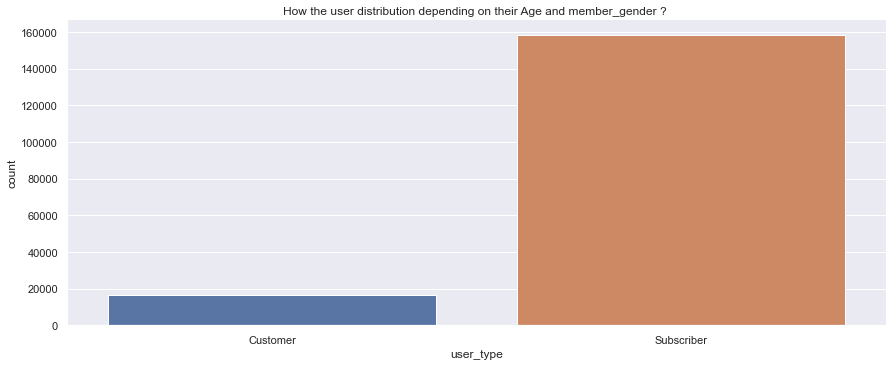

In [535]:
# Diagramme en barre de la variable user_type
sns.factorplot(x = 'user_type', data=data , kind = 'count',aspect = 2.5);
plt.title("How the user distribution depending on their Age and member_gender ? ")

Le graphique ci-dessus révèle que la majorité des utilisateurs sont des abonnés.

### Quelle est la distribution du genre ?

In [463]:
# Obtenir le décompte des valeurs du genre
gender_count = data.member_gender.value_counts()

# Diagramme circulaire de la distribution du genre
plt.pie(gender_count, labels = gender_count.index, startangle = 90, counterclock = False);
plt.title("Distribution du genre")
fig=plt.gcf()
fig.set_size_inches(8, 8)
plt.show();

### Quelle est la distribution de l'âge des utilisateurs ?

In [443]:
plt.figure(figsize=(15, 7))
plt.hist(data = data, x = 'age');
plt.title("Distribution de l'âge des utilisateurs")
plt.show()

Le graphique ci-dessus montre que la majorité des utilisateurs ont un âge compris entre 22 et 39 ans.

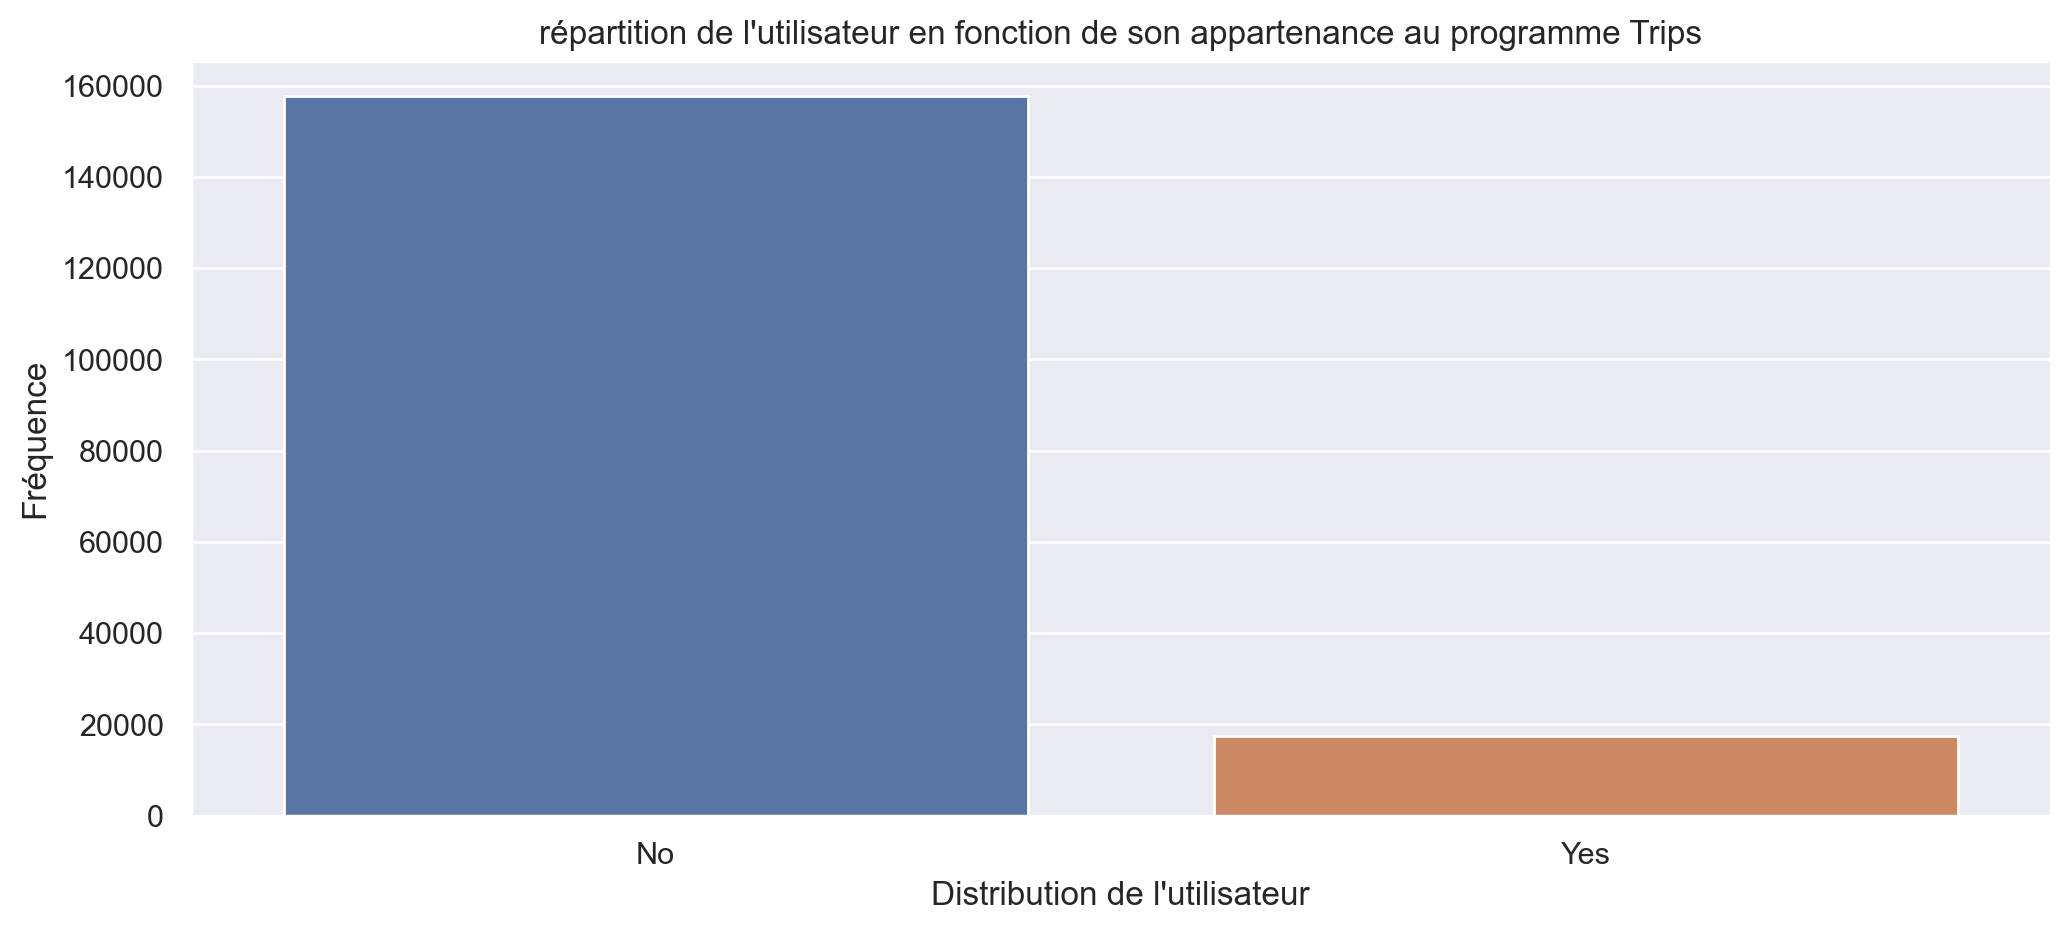

In [461]:
# 
plt.figure(figsize = (12, 5), dpi = 200)

plot = sns.countplot(data = data, x = 'bike_share_for_all_trip')

plt.xlabel("Distribution de l'utilisateur")
plt.ylabel('Fréquence')
plt.title("Répartition de l'utilisateur en fonction de son appartenance au programme Trips")

plt.show()

### La colonne âge comporte t-il de valeures aberrantes ?

L'histogramme de la distribution des âges des utilisateurs ne montrent pas clairement si la colonne **age** contient des valeurs aberrantes ou non. Nous allons donc construire la boîte à moustache pour détecter les valeurs aberrantes au cas où elles existent.

In [425]:
# Boîte à moustache de la colonne âge
plt.figure(figsize = (10, 5), dpi = 200)

plt.boxplot(data['age'], vert=False)

plt.xlabel("Âge des utilisateurs")
plt.ylabel('Fréquence')
plt.title("Répartition de l'âge des utilisateurs")

plt.show();

### Quelle est la station de vélo la plus fréquentée ?

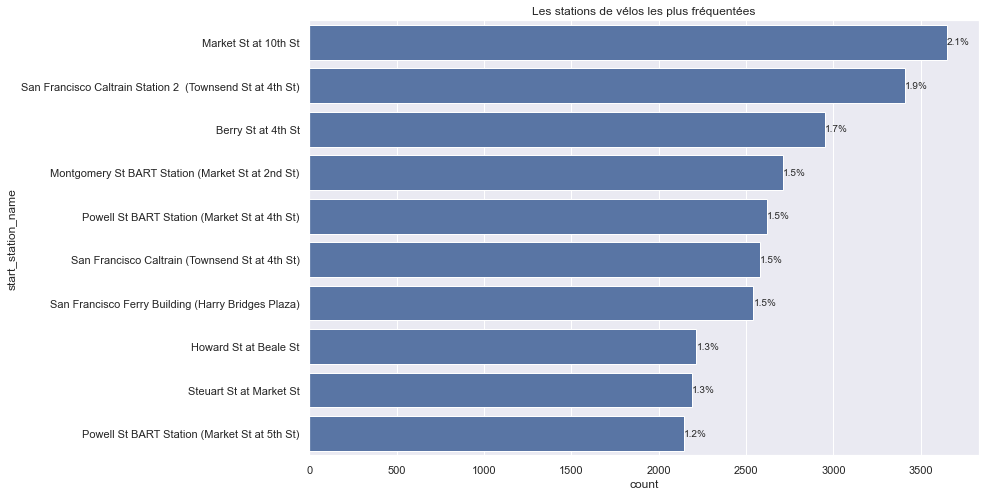

In [431]:
# Most popular Start station 
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
c = sns.color_palette()[0]
o = data.start_station_name.value_counts().head(10).index
sb.countplot(data=data , y='start_station_name' , color=c , order=o);

# Putting percentage  
start_counts = data.start_station_name.value_counts().head(10)
for i in range(start_counts.shape[0]):
  count = start_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/data.shape[0])
  plt.text(count+1, i, pct_string, va = 'center')
  plt.title("Les stations de vélos les plus fréquentées");

In [441]:

plot = sns.catplot(data = data, x='start_time_hour', kind='count', color = color, aspect = 2.7)
plot.set_axis_labels('Hours', 'Number of Bike Rides')
plot.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

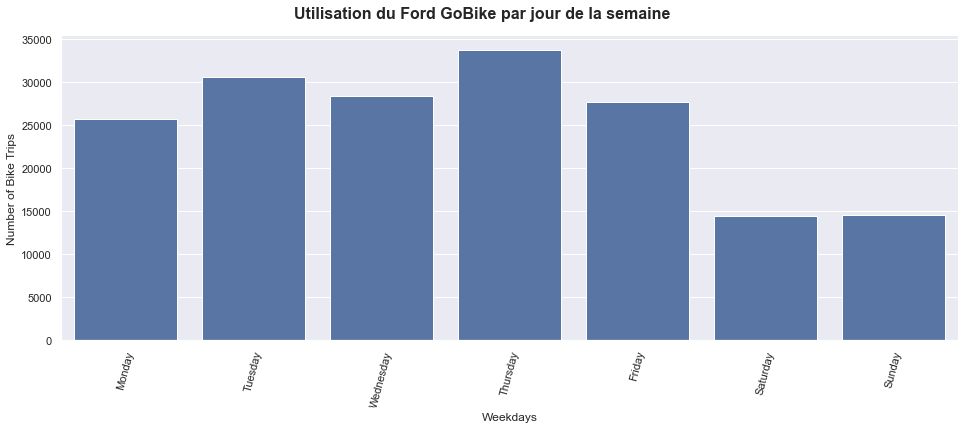

In [444]:
# Utilisation en semaine du système de vélo
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot = sns.catplot(data=data, x='start_time_weekday', kind='count', color = color, order = weekday, aspect = 2.7)
plot.set_axis_labels('Weekdays', 'Number of Bike Trips')
plot.fig.suptitle('Utilisation du Ford GoBike par jour de la semaine', y=1.05, fontsize=16, fontweight='bold');
plot.set_xticklabels(rotation=75);

In [505]:
# la variable cible : species
fig = px.box(data, x = 'duration_sec', y='member_gender', color='member_gender',template='plotly_dark')
fig

### Quelle est la distribution de la 

## Exploration Bivariée

Examinons maintenant les relations entre deux variables de notre jeu de données.

### Quelle est la durée moyenne de trajet pour les catégories de type d'usagers ?

In [452]:
# Répartition de l'âge par type d'utilisateur

plt.figure(figsize = (14, 6), dpi = 75)

sns.boxplot(data = data, x = 'user_type', y = 'age')

plt.xlabel('Âge des utilisateurs')

plt.ylabel('Fréquence')


plt.title("Répartition des utilisateurs en fonction de l'âge et du type d'usagers")

plt.show()

Les clients effectuent un voyage plus long en vélo que les abonnés.

### Quelle est la durée du trajet pour chaque genre en minutes ?

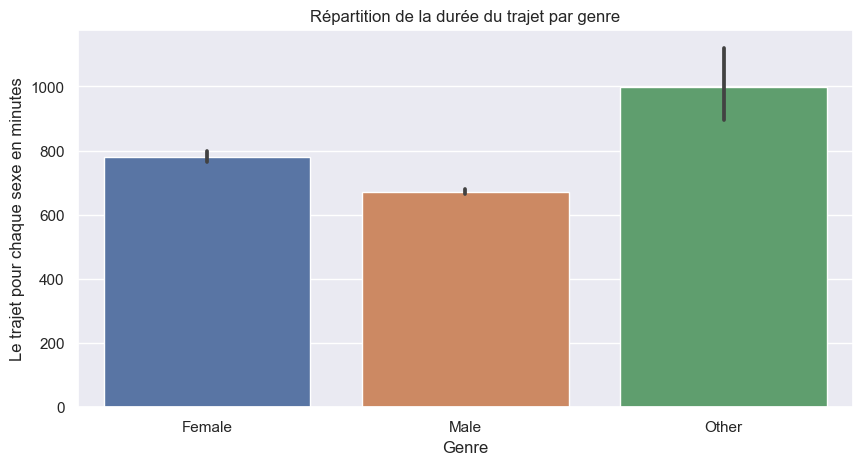

In [455]:
# Répartition de la durée par genre

plt.figure(figsize = (10, 5), dpi = 100)
sns.barplot(data = data, x = "member_gender", y = "duration_sec")
plt.xlabel('Genre')
plt.ylabel('Le trajet pour chaque sexe en minutes')
plt.title("Répartition de la durée du trajet par genre")
plt.show()

### Comment est la répartition des utilisateurs en fonction de leur Age et de leur genre ?

In [467]:
# Diagramme de violin
sns.factorplot(x = 'member_gender', y = 'age' , data = data , kind='violin', aspect=2.5);
plt.title("Répartition des utilisateurs en fonction de l'âge et du genre");

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Le sexe de l'utilisateur en tant que femme est plus que les autres.

## Exploration Multivariée

Dans cette partie, nous allons créer des graphiques de trois variables ou plus pour approfondir nos analyses.

### Quelle est la corrélation entre chaque variable de l'ensemble de données ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


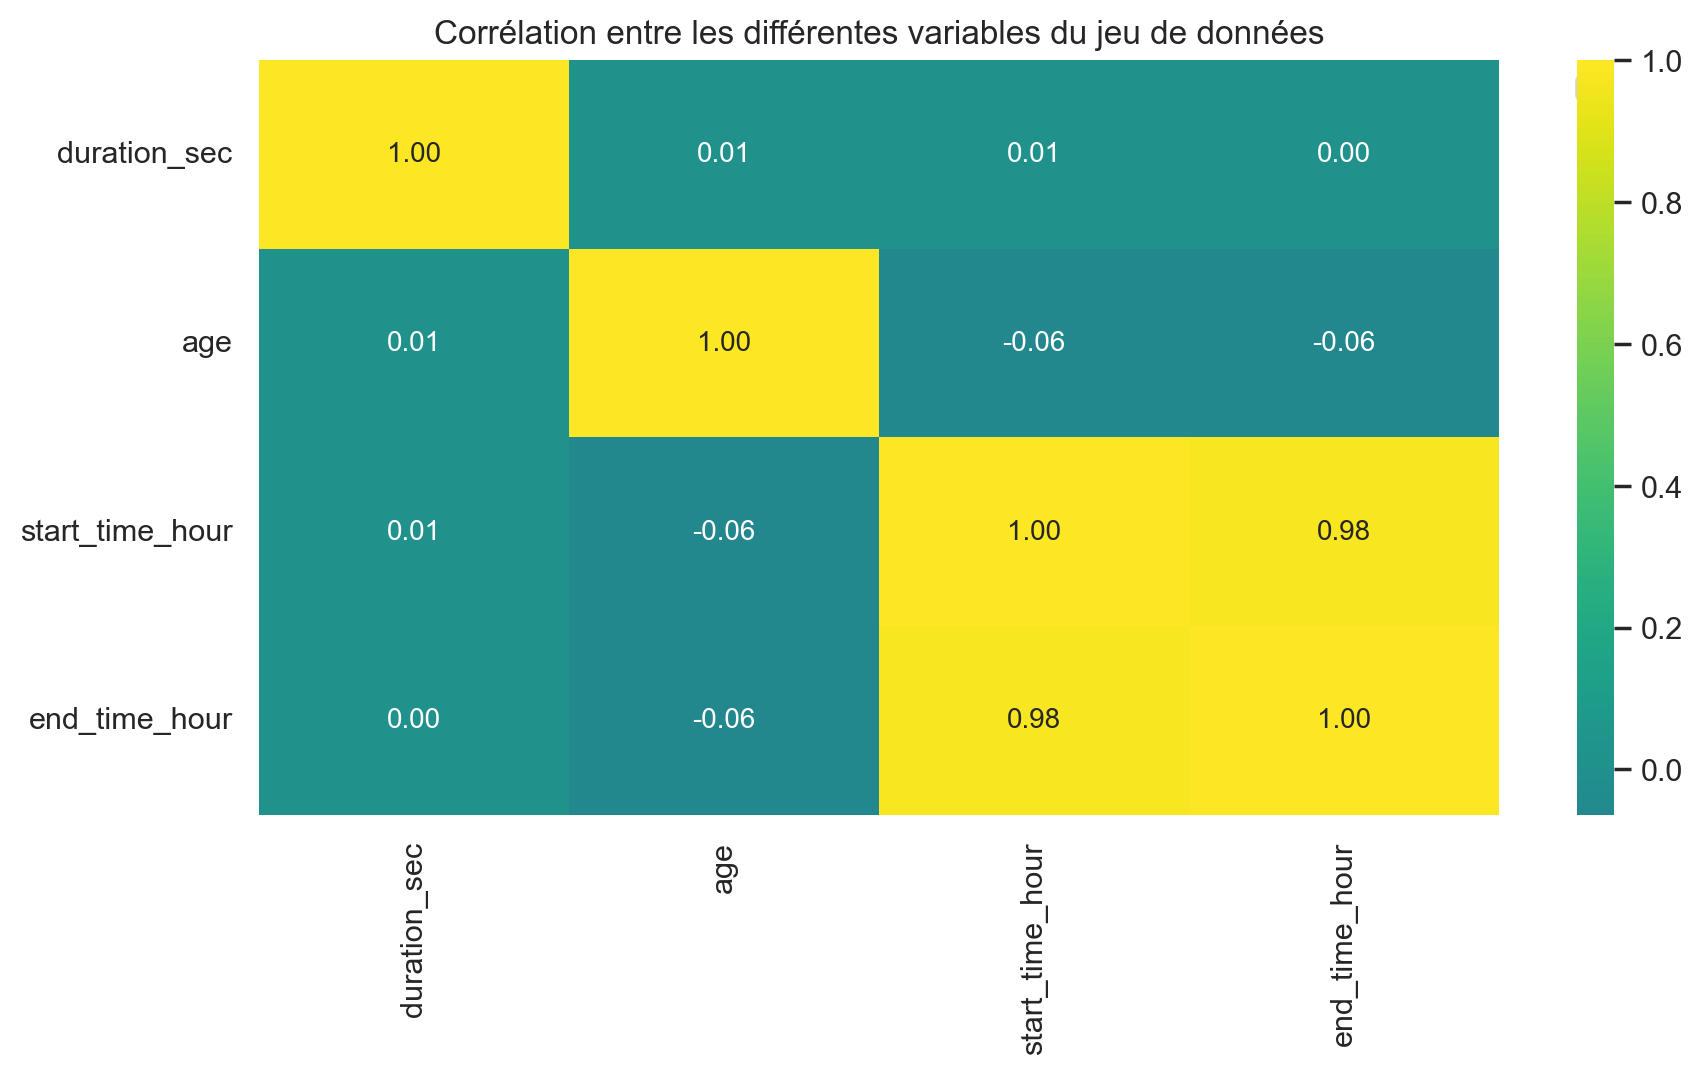

In [490]:
# Matrice de corrélation entre les variables du jeu de données

plt.figure(figsize = (10,5), dpi = 200)

sb.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'viridis', center = 0)

plt.title("Corrélation entre les différentes variables du jeu de données")

plt.xticks(rotation = 90)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

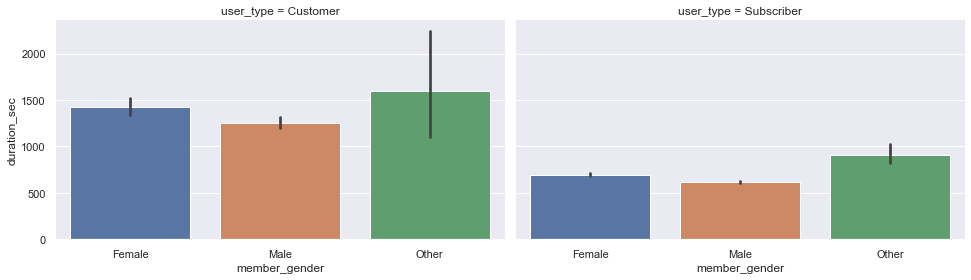

In [486]:
sns.catplot(x = "member_gender", y = "duration_sec", col = "user_type", data = data, kind = "bar", height = 4, aspect = 1.7);

### Quelle est la corrélation entre les "variables numériques spécifiques" dans l'ensemble de données ?

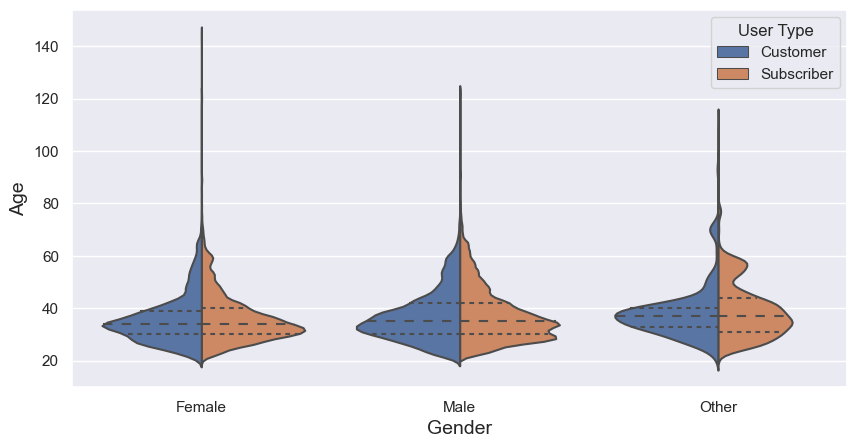

In [495]:
plt.figure(figsize = (10, 5), dpi = 100)
plot = sns.violinplot(data=data, x='member_gender', y='age', hue="user_type", split=True,  inner="quartile")
plot.set_xlabel("Gender", fontsize=14)
plot.set_ylabel("Age", fontsize=14)
plt.legend(title="User Type");

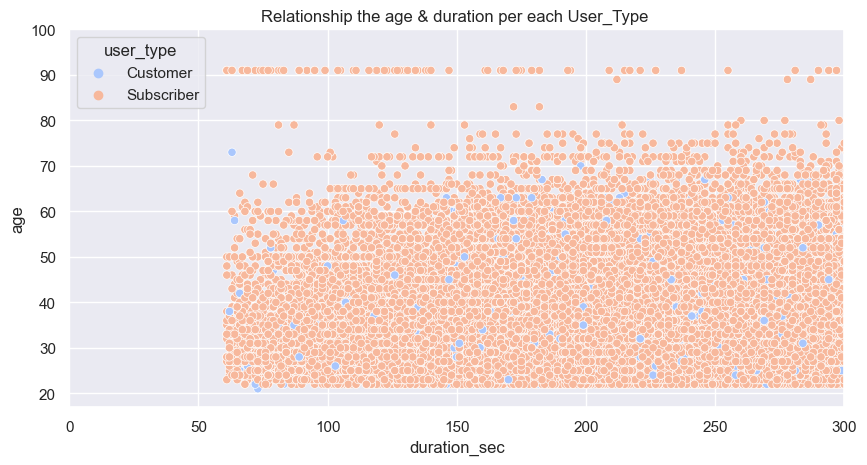

In [538]:
#plotting Relationship the age & duration per each User_Type 
plt.figure(figsize = (10, 5), dpi = 100)
sns.scatterplot(data = data, x = data.duration_sec , y = data.age , hue ='user_type',palette = "coolwarm")
plt.ylim((17,100))
plt.xlim((0,300))
plt.title("Relationship the age & duration per each User_Type ")
plt.show()

E:\ANACONDA\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



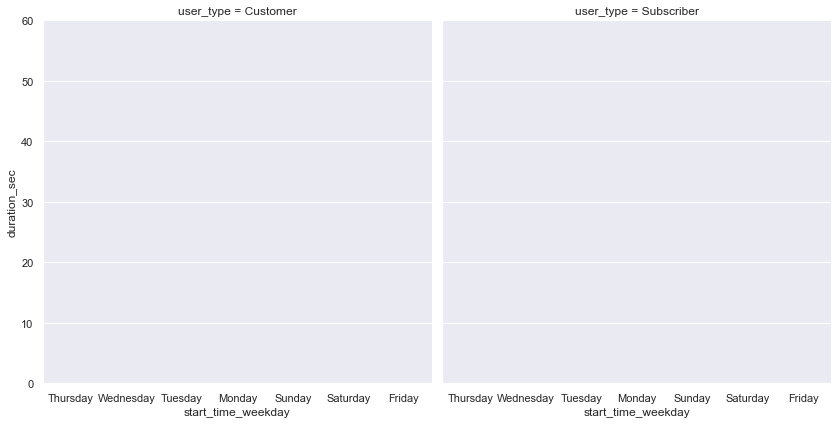

In [540]:
base_color = sns.color_palette()[5]
g = sns.FacetGrid(data = data, col = "user_type", height = 6 )
g.map(sns.boxplot, 'start_time_weekday', 'duration_sec', color = base_color)
plt.ylim((0,60))
plt.show()

In [545]:
# plotting Relationship the age & duration  using Scatter Plot
sns.scatterplot(data = data, x =  duration_in_Minute , y =  data.age , alpha = 0.2 )
plt.ylim((17,100))
plt.xlim((0,250))
plt.title("Relationship the age & duration ")
plt.show()

NameError: name 'duration_in_Minute' is not defined

In [ ]:
#plotting the Relationship between days of the week & rid duration using the Voilin Plot
sb.violinplot(data = df2, x =  df2.day , y =df2.duration_in_Minute , color=base_color , order=order_days )
plt.ylim((0,55))
plt.title("Relationship between days of the week & rid duration ")
plt.show()

In [546]:
# adding new column for duration_in_Minute
data["duration_in_minute"] = round(data.duration_sec/60,2)

In [547]:
data.columns

Index(['duration_sec', 'start_station_name', 'end_station_name', 'user_type',
       'member_gender', 'bike_share_for_all_trip', 'age', 'start_time_month',
       'start_time_weekday', 'start_time_hour', 'end_time_hour',
       'duration_in_Minute', 'duration_in_minute'],
      dtype='object')

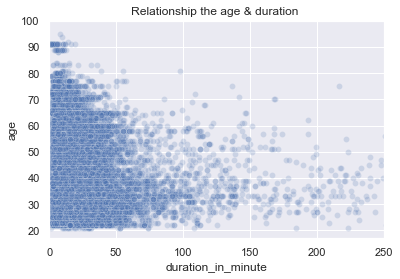

In [551]:
# plotting Relationship the age & duration  using Scatter Plot
sns.scatterplot(data = data, x =  data.duration_in_minute , y =  data.age , alpha = 0.2 )
plt.ylim((17,100))
plt.xlim((0,250))
plt.title("Relationship the age & duration ")
plt.show()

In [553]:
data.dtypes

duration_sec                  int64
start_station_name           object
end_station_name             object
user_type                  category
member_gender              category
bike_share_for_all_trip    category
age                           int64
start_time_month             object
start_time_weekday           object
start_time_hour               int64
end_time_hour                 int64
duration_in_Minute          float64
duration_in_minute          float64
dtype: object